In [ ]:
!gdown '1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b'
!gdown '1dj-Jl92zPFN-vcDaGl3MRhm6PUuqx6Ft'

Downloading...
From: https://drive.google.com/uc?id=1ZCiLoprlnFoLF-cAb779uWz-N8b8UI6b
To: /content/Data_KNN_group_by.csv
100% 1.77M/1.77M [00:00<00:00, 155MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dj-Jl92zPFN-vcDaGl3MRhm6PUuqx6Ft
To: /content/VN province.csv
100% 2.19k/2.19k [00:00<00:00, 7.69MB/s]


In [ ]:
import pandas as pd
job_data = pd.read_csv('/content/Data_KNN_group_by.csv')

In [ ]:

location_data = pd.read_csv('/content/VN province.csv')
job_data = job_data[job_data['Salary'] != 'Thỏa thuận']

In [ ]:
import pandas as pd
import folium


merged_data = pd.merge(job_data, location_data, left_on='location', right_on='Province')

map_vietnam = folium.Map(location=[15.9, 105.9], zoom_start=6)


province_counts = merged_data['Province'].value_counts()



In [ ]:
merged_data.to_csv("Data_toa_do.csv", index = False)

In [ ]:
for province, count in province_counts.items():

    province_location = location_data.loc[location_data['Province'] == province].iloc[0]


    radius = count / 50

    folium.CircleMarker(
        location=[province_location['Latitude'], province_location['Longitude']],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"{province}: {count} data points",
    ).add_to(map_vietnam)

In [ ]:
data = job_data[job_data['Salary'] != 'Thỏa thuận']

In [ ]:
data['Salary'] = data['Salary'].astype(int)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


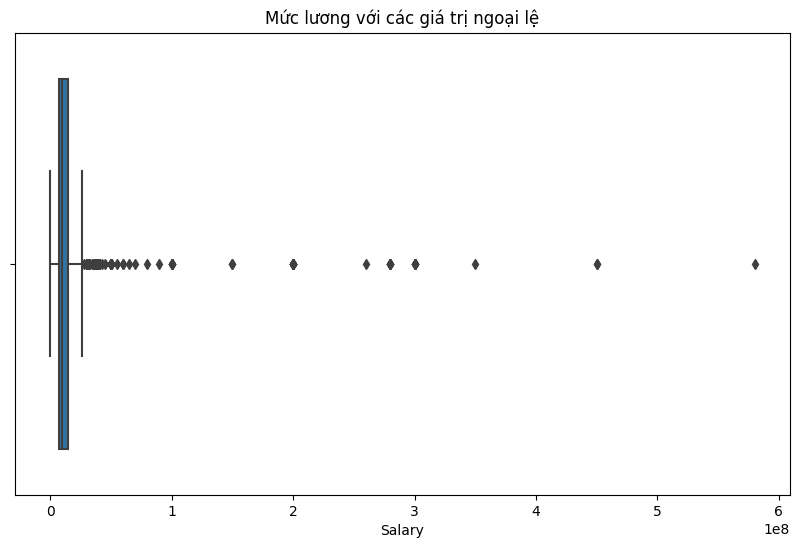

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Salary'], orient = 'v')
plt.title('Mức lương với các giá trị ngoại lệ')
plt.xlabel('Salary')
plt.show()

In [ ]:
data['location'].value_counts()

Tp Hồ Chí Minh       1277
Hà Nội                332
Bình Dương            154
Đà Nẵng                91
Đồng Nai               50
Long An                41
Cần Thơ                33
Đắk Lắk                16
Lâm Đồng               16
Bà Rịa - Vũng Tàu      11
Bình Phước              9
Khánh Hòa               9
Kiên Giang              8
Hải Phòng               7
Quảng Nam               7
Tây Ninh                6
Hưng Yên                6
Thừa Thiên Huế          5
Tiền Giang              4
Sóc Trăng               4
Ninh Thuận              3
Bắc Giang               3
Vĩnh Long               3
Bắc Ninh                3
An Giang                3
Bình Thuận              3
Nghệ An                 3
Gia Lai                 2
Bến Tre                 2
Hậu Giang               2
Trà Vinh                2
Thái Nguyên             2
Quảng Ngãi              2
Nam Định                2
Quảng Ninh              2
Đồng Tháp               1
Quảng Trị               1
Quảng Bình              1
Hà Tĩnh     

<ipython-input-31-c7141ff99af9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary_Range'] = pd.cut(data['Salary'], bins=bins, labels=labels, right=False)


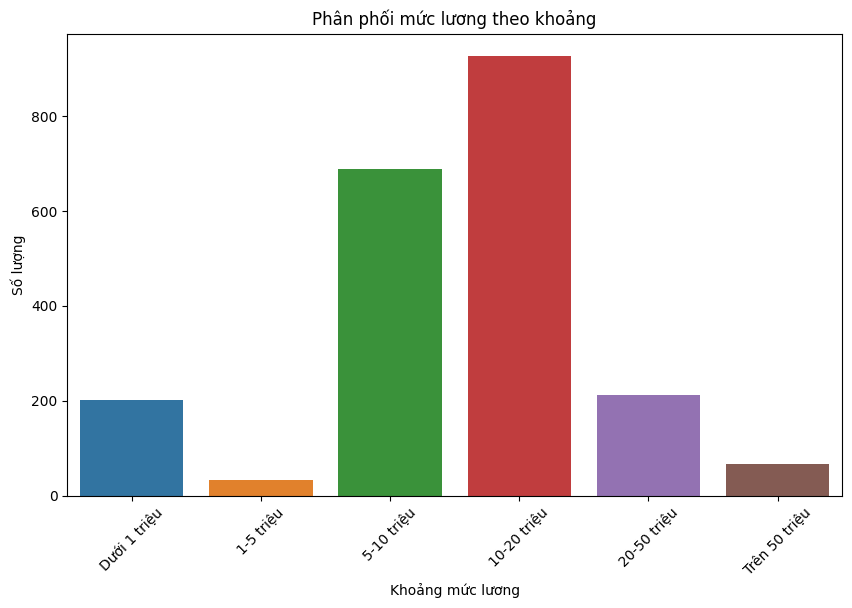

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 1e6, 5e6, 10e6, 20e6, 50e6, data['Salary'].max()]
labels = ['Dưới 1 triệu', '1-5 triệu', '5-10 triệu', '10-20 triệu', '20-50 triệu', 'Trên 50 triệu']


data['Salary_Range'] = pd.cut(data['Salary'], bins=bins, labels=labels, right=False)


salary_range_counts = data['Salary_Range'].value_counts(sort=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values)
plt.title('Phân phối mức lương theo khoảng')
plt.xlabel('Khoảng mức lương')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()



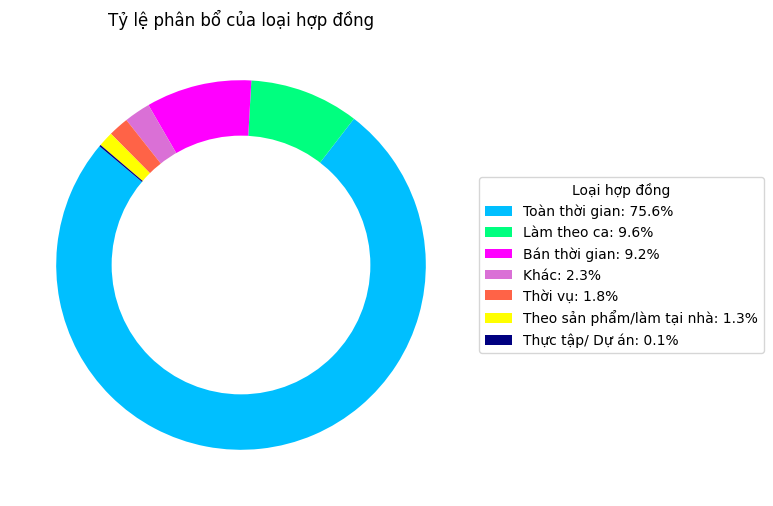

In [ ]:
contract_type_counts = data['contractType'].value_counts()
explode_values = [0.1] * len(contract_type_counts)
contract_type_percentages = 100 * contract_type_counts / contract_type_counts.sum()

legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(contract_type_counts.index, contract_type_percentages)]
colors = ['deepskyblue', 'springgreen' ,'fuchsia' , 'orchid','tomato' ,'yellow', 'navy']
plt.figure(figsize=(10, 6))
plt.pie(contract_type_counts, colors=colors, labels=None, startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Tỷ lệ phân bổ của loại hợp đồng')
plt.legend(legend_labels, title="Loại hợp đồng", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

<ipython-input-103-f0c67b347491>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location_Grouped'] = data['location'].apply(categorize_location)


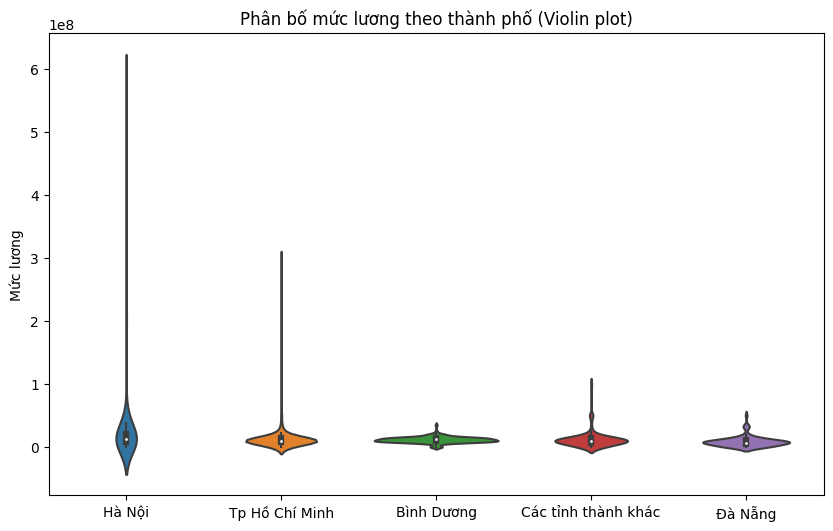

In [ ]:
def categorize_location(loc):
    if loc in ['Hà Nội', 'Tp Hồ Chí Minh', 'Bình Dương', 'Đà Nẵng']:
        return loc
    else:
        return 'Các tỉnh thành khác'

data['Location_Grouped'] = data['location'].apply(categorize_location)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Location_Grouped', y='Salary', data=data)
plt.title('Phân bố mức lương theo thành phố (Violin plot)')
plt.xlabel('')
plt.ylabel('Mức lương')
plt.show()


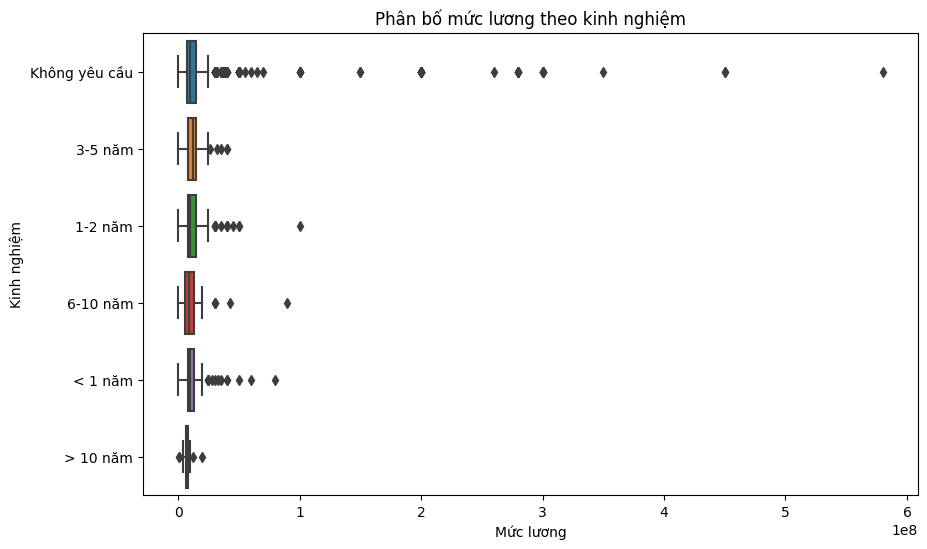

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='experience', data=data)
plt.title('Phân bố mức lương theo kinh nghiệm')
plt.xlabel('Mức lương')
plt.ylabel('Kinh nghiệm')
plt.show()

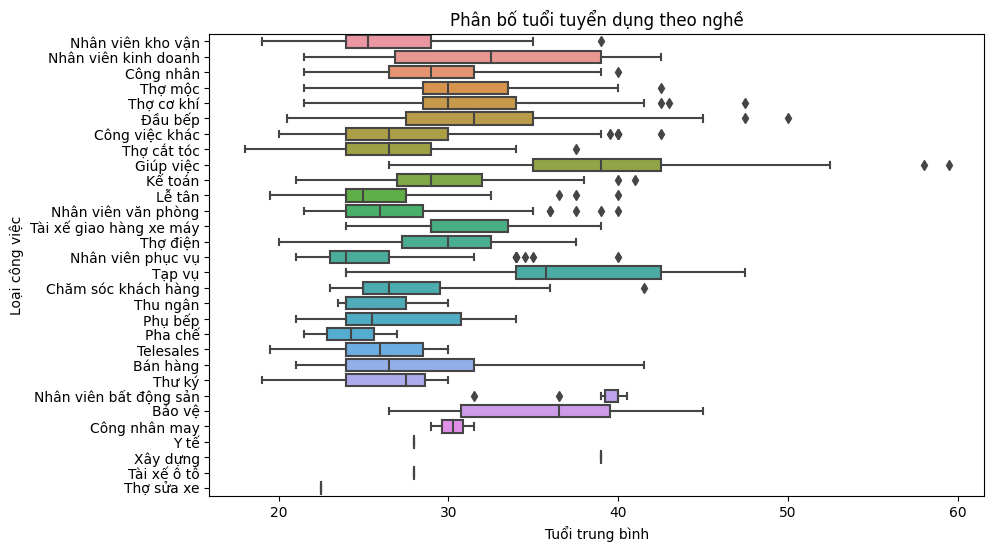

In [ ]:
data['Average_Age'] = (data['minAge'] + data['maxAge']) / 2

plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Age', y='jobType', data=data)
plt.title('Phân bố tuổi tuyển dụng theo nghề')
plt.xlabel('Tuổi trung bình')
plt.ylabel('Loại công việc')
plt.show()


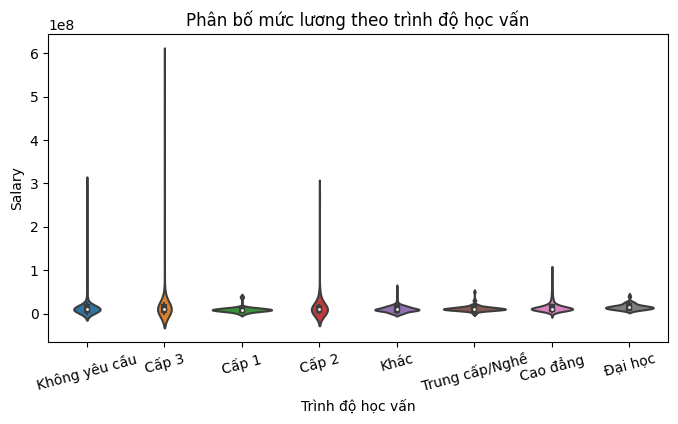

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ violin ngang cho phân bố mức lương theo trình độ học vấn
plt.figure(figsize=(8,4))
sns.violinplot(y='Salary', x='education', data=data)
plt.title('Phân bố mức lương theo trình độ học vấn')
plt.xlabel('Trình độ học vấn')

plt.xticks(rotation = 15)
plt.show()


In [ ]:
df = data.select_dtypes(include = 'object')
df['Salary'] = data['Salary'].copy()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
affect = []
for column in df.columns:
  if column == 'Salary':
    continue
  model = ols(f'Salary ~ {column}', data = df).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  p_value = anova_table['PR(>F)'][0]
  if p_value < 0.05:
    affect.append(column)
print(f"Các biến phân loại có ảnh hưởng tới lương: {affect}")

Các biến phân loại có ảnh hưởng tới lương: ['location', 'companyType', 'salaryType', 'contractType', 'jobType', 'experience', 'gender', 'education', 'Partner']


In [ ]:
import scipy.stats as stats
def kiemTraMucDoAnhHuong(s1: pd.Series, s2: pd.Series) -> str:
    r, p = stats.pearsonr(s1, s2)
    if p < 0.05:
        if abs(r) == 0:
            return "Không"
        elif abs(r) <= 0.3:
            return "Không"
        elif abs(r) > 0.3 and abs(r) <= 0.5:
            return "Yếu"
        elif abs(r) > 0.5 and abs(r) <= 0.8 :
            return "Vừa"
        elif abs(r) > 0.8 :
            return "Mạnh"
    else:
        return "Không ảnh hưởng"

In [ ]:
def timBienAnhHuong(df2: pd.DataFrame, price: pd.Series) -> list:
  ds = []
  for column_name in df2:
        if kiemTraMucDoAnhHuong(df2[column_name], price):
            ds.append((column_name,kiemTraMucDoAnhHuong(df2[column_name], price)))
  return ds

In [ ]:
df3 = data.select_dtypes(include = 'number')
result_list = timBienAnhHuong(df3,data['Salary'])

In [ ]:
ds = []
for i in df3.columns:
  if i == 'Salary':
    continue
  r, p = stats.pearsonr(data[i], data['Salary'])
  ds.append((i,r,p))
ds

[('index', -0.023705369266936647, 0.2740353369552579),
 ('vacacies', 0.0595287236410112, 0.0059807408656436575),
 ('minAge', 0.00576021330644208, 0.7904290530675733),
 ('maxAge', 0.2613566945863706, 1.2841079053113218e-34),
 ('Average_Age', 0.2176350553355699, 2.9063800489292272e-24)]

In [ ]:
data['decription'].count()

2131

In [ ]:
data['Salary'].max()

580000000